In [1]:
# TODO: Optimize MCMC code to run faster using parallelization or multithreading
# TODO: Add detailed docstrings to all functions and classes for better code documentation
# TODO: Implement unit tests
# TODO: Add more flexible parameter grid options for the models
# TODO: Investigate old code to understand why Spearman's rho used to be higher and orders were closer to the ideal order

import sys
import os

# set the path to the parent directory of 'simulation_class'
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from simulation_class.canonical_generator import CanonicalGenerator
from simulation_class.sample_generator import SampleGenerator
from simulation_class.disease_progression_analyzer import DiseaseProgressionAnalyzer
from simulation_class.EBMAnalyzer import EBMAnalyzer

## SIGMOID demo

ValueError: x and y must have same first dimension, but have shapes (10,) and (1000,)

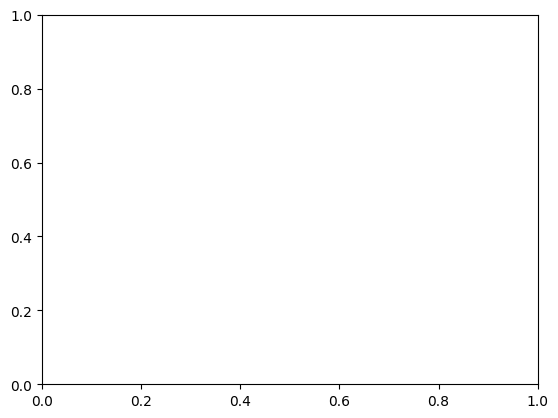

In [2]:
# model parameters
n_biomarkers_stages = 10
model_type = 'sigmoid'
biomarkers_params_sigmoid = {
    0: {'s': 2.5, 'c': 2.0},
    1: {'s': 2.5, 'c': 2.5},
    2: {'s': 2.5, 'c': 3.0},
    3: {'s': 2.5, 'c': 3.5},
    4: {'s': 2.5, 'c': 4.0},
    5: {'s': 2.5, 'c': 4.5},
    6: {'s': 2.5, 'c': 5.0},
    7: {'s': 2.5, 'c': 5.5},
    8: {'s': 2.5, 'c': 6.0},
    9: {'s': 2.5, 'c': 6.5},
}

# Generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarkers_stages, model_type, biomarkers_params=biomarkers_params_sigmoid)

# Plot disease progression
canonical_generator.plot_disease_progression()

# Cell 3: Generate patient samples and plot histograms
# Generate patient samples
n_patients = 1000
sample_generator = SampleGenerator(canonical_generator, n_patients, add_noise=False, noise_std=0, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

# Plot stage histogram
sample_generator.plot_stage_histogram()

# Plot biomarker distribution
sample_generator.plot_biomarker_distribution(biomarker_index=1, healthy_stage_threshold=0.5)

# Plot a patient's biomarkers
sample_generator.plot_patient_biomarkers(patient_index=400)

In [3]:
# run analysis
analyzer = DiseaseProgressionAnalyzer(patient_samples)
likelihood_matrix, orders, rho, loglike, update_iters, probas = analyzer.run_analysis('ebm')
print("Spearman's rho values:", rho)

# print orders
analyzer.print_orders()

100%|██████████| 500000/500000 [02:19<00:00, 3573.77it/s]

Spearman's rho values: -0.28484848484848485
First 10 MCMC sampled orders: [array([3, 4, 5, 6, 7, 8, 9, 1, 2, 0]), array([3, 4, 5, 6, 7, 8, 9, 0, 2, 1]), array([3, 4, 5, 6, 7, 8, 9, 0, 1, 2]), array([3, 4, 5, 6, 7, 8, 9, 2, 1, 0]), array([3, 4, 5, 6, 7, 8, 9, 2, 0, 1]), array([3, 4, 5, 6, 7, 8, 9, 2, 1, 0]), array([3, 4, 5, 6, 7, 8, 9, 0, 1, 2]), array([3, 4, 5, 6, 7, 8, 9, 1, 0, 2]), array([3, 4, 5, 6, 7, 8, 9, 0, 1, 2]), array([3, 4, 5, 6, 7, 8, 9, 0, 2, 1])]


In [4]:
print(likelihood_matrix)
print(likelihood_matrix.shape)

[[3.00988554e-10 7.91210689e-05 8.51790114e-02 ... 2.07339079e-02
  3.11114625e-01 1.84319072e-03]
 [3.15253085e-10 1.45168185e-04 2.97171975e-09 ... 2.68679842e-02
  3.18681062e-01 6.57242486e-10]
 [2.17340096e-03 2.55452711e-04 2.01298277e-02 ... 7.85256884e-02
  2.37229457e-01 6.93341991e-10]
 ...
 [3.37315860e-01 8.10409277e-14 1.28756340e-01 ... 3.44179323e-11
  3.18663766e-10 3.25191201e-01]
 [3.70674648e-01 8.43486476e-14 9.63537183e-02 ... 1.43614734e-04
  3.31670163e-10 5.38131401e-02]
 [2.87208073e-01 7.70793639e-14 6.69581086e-01 ... 1.63399295e-04
  3.03086367e-10 5.98773992e-01]]
(10, 1000)


### TRANSITION MATRIX demo

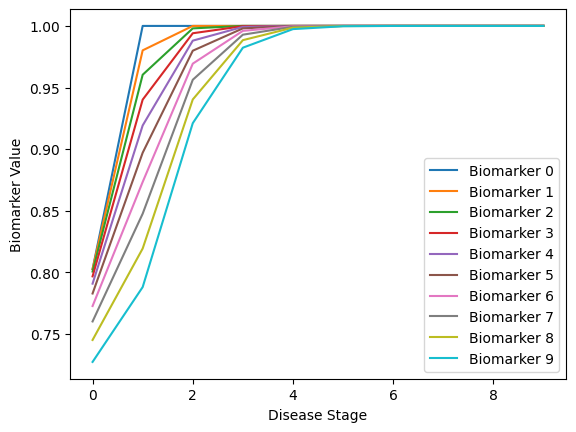

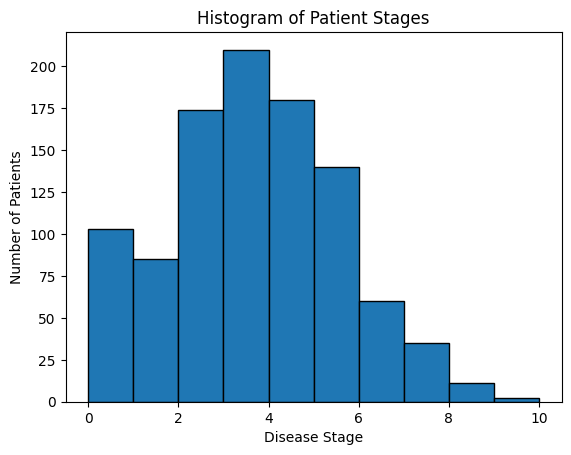

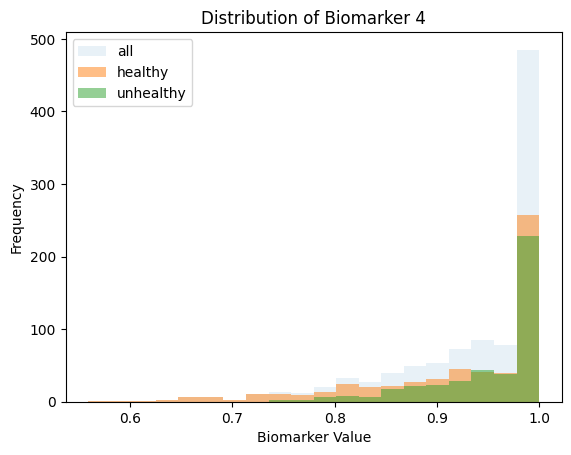

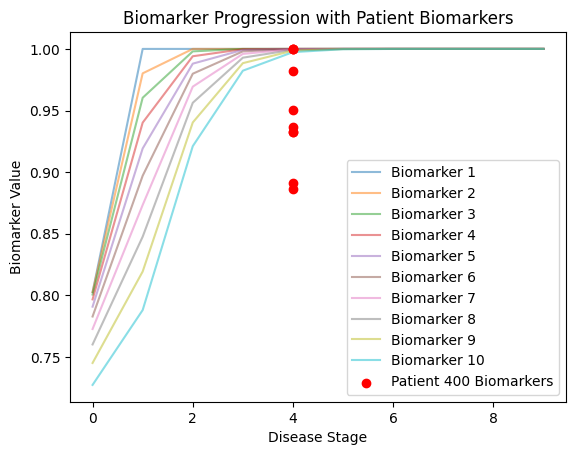

In [4]:
# model parameters
n_biomarkers = 10
n_stages = 10
model_type = 'transition_matrix'
biomarkers_params_transition = {'coeff': 1e-1}

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarkers, n_stages, model_type, biomarkers_params=biomarkers_params_transition)

# plot disease progression
canonical_generator.plot_disease_progression()

# generate patient samples
n_patients = 1000
sample_generator = SampleGenerator(canonical_generator, n_patients, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

# plotting methods
sample_generator.plot_stage_histogram()
sample_generator.plot_biomarker_distribution(biomarker_index = 3, healthy_stage_threshold=3)
sample_generator.plot_patient_biomarkers(patient_index=400)


In [5]:
# run analysis
analyzer = DiseaseProgressionAnalyzer(patient_samples)
likelihood_matrix, orders, rho, loglike, update_iters, probas = analyzer.run_analysis('ebm')
print("Spearman's rho values:", rho)

# print orders
analyzer.print_orders()

100%|██████████| 500000/500000 [02:16<00:00, 3659.52it/s]


Spearman's rho values: -0.8666666666666665
First 10 MCMC sampled orders: [array([7, 8, 9, 6, 4, 5, 3, 0, 2, 1]), array([7, 8, 9, 6, 5, 4, 3, 0, 2, 1]), array([7, 8, 9, 6, 4, 5, 3, 0, 2, 1]), array([7, 8, 9, 6, 5, 4, 3, 0, 2, 1]), array([7, 8, 9, 6, 4, 5, 3, 0, 2, 1]), array([7, 8, 9, 6, 5, 4, 3, 0, 2, 1]), array([7, 8, 9, 6, 4, 5, 3, 0, 2, 1]), array([7, 8, 9, 6, 5, 4, 3, 0, 2, 1]), array([7, 8, 9, 6, 4, 5, 3, 0, 2, 1]), array([7, 8, 9, 6, 5, 4, 3, 0, 2, 1])]


## ODE demo

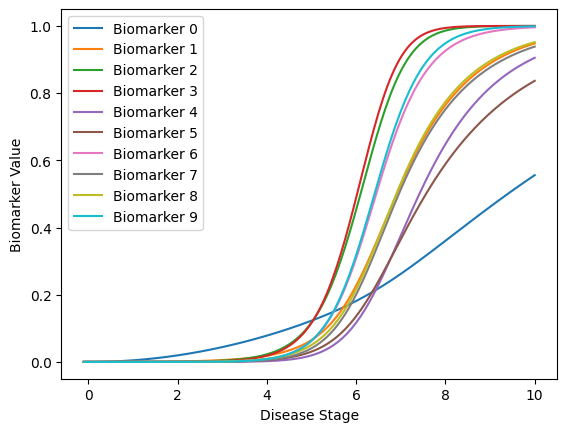

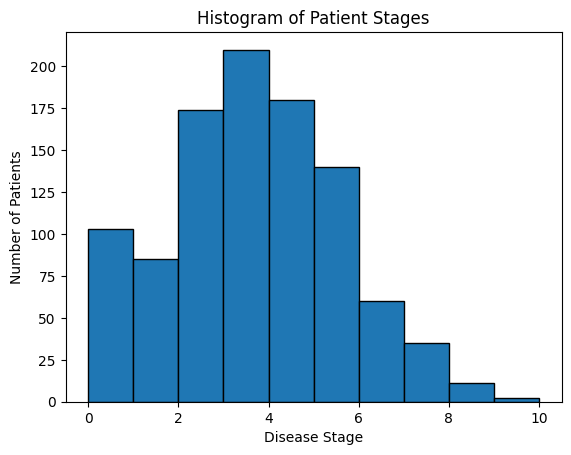

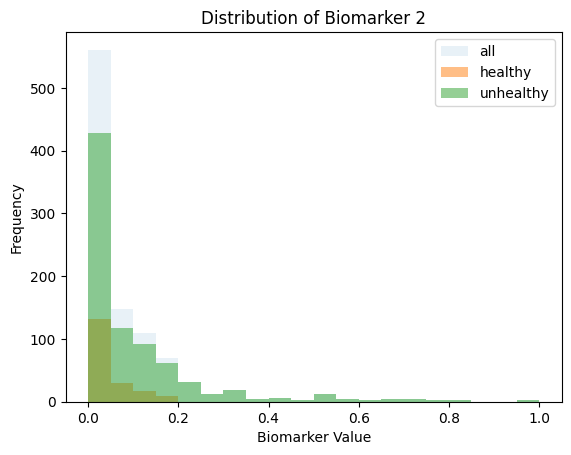

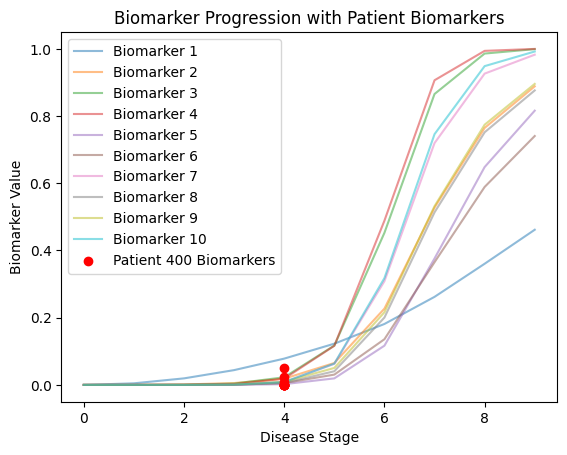

In [6]:
# TODO: add param grid options
# model parameters
n_biomarkers = 10
n_stages = 10
model_type = 'ode'

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarkers, n_stages, model_type)

# plot disease progression
canonical_generator.plot_disease_progression()

# generate patient samples
n_patients = 1000   
sample_generator = SampleGenerator(canonical_generator, n_patients, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

# plot stage histogram
sample_generator.plot_stage_histogram()
sample_generator.plot_biomarker_distribution(biomarker_index=1, healthy_stage_threshold=1)
sample_generator.plot_patient_biomarkers(patient_index=400)

In [7]:
# run analysis
analyzer = DiseaseProgressionAnalyzer(patient_samples)
orders, rho, loglike, update_iters, probas = analyzer.run_analysis('ebm')
print("Spearman's rho values:", rho)

# print orders
analyzer.print_orders()

100%|██████████| 500000/500000 [02:16<00:00, 3651.36it/s]

Spearman's rho values: 0.41818181818181815
First 10 MCMC sampled orders: [array([0, 3, 2, 9, 6, 1, 8, 7, 5, 4]), array([0, 3, 2, 9, 1, 6, 8, 7, 5, 4]), array([0, 2, 3, 9, 1, 6, 8, 7, 5, 4]), array([0, 2, 3, 9, 6, 1, 8, 7, 5, 4]), array([0, 3, 2, 9, 6, 1, 8, 7, 5, 4]), array([0, 3, 2, 6, 9, 1, 8, 7, 5, 4]), array([0, 2, 3, 6, 9, 1, 8, 7, 5, 4]), array([0, 3, 2, 6, 9, 1, 8, 7, 5, 4]), array([0, 3, 2, 9, 6, 1, 8, 7, 5, 4]), array([0, 2, 3, 9, 6, 1, 8, 7, 5, 4])]
